In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time

In [2]:
confirmed = pd.read_csv('/Users/Zhang/Desktop/jupyter/ncov/time_series_covid_19_confirmed.csv')
death = pd.read_csv('time_series_covid_19_deaths.csv')
recovered = pd.read_csv('time_series_covid_19_recovered.csv')

In [3]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,...,860,889,910,934,950,962,973,982,986,987
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,...,342,352,366,372,375,380,381,387,393,395
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,...,505,518,529,537,544,551,553,555,560,567
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,...,267,272,279,281,285,287,290,292,293,293
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,86,87,90,90,90,90,91,91,91,91


In [4]:
confirmed = confirmed.loc[confirmed['Province/State'] == 'Hubei']
death = death.loc[death['Province/State'] == 'Hubei']
recovered = recovered.loc[recovered['Province/State'] == 'Hubei']

In [5]:
death = death.replace(to_replace ="Hubei",value ="death") 
confirmed = confirmed.replace(to_replace ="Hubei",value ="confirmed") 
recovered = recovered.replace(to_replace ="Hubei",value ="recovered") 

In [6]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
12,confirmed,Mainland China,30.97564,112.2707,444,444,549,761,1058,1423,...,33366,33366,48206,54406,56249,58182,59989,61682,62031,62442


In [7]:
dataset = pd.concat([confirmed,death,recovered])

In [8]:
dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
12,confirmed,Mainland China,30.97564,112.2707,444,444,549,761,1058,1423,...,33366,33366,48206,54406,56249,58182,59989,61682,62031,62442
12,death,Mainland China,30.97564,112.2707,17,17,24,40,52,76,...,1068,1068,1310,1457,1596,1696,1789,1921,2029,2144
12,recovered,Mainland China,30.97564,112.2707,28,28,31,32,42,45,...,2639,2686,3459,4774,5623,6639,7862,9128,10337,11788


In [9]:
dataset = dataset.drop(columns=['Country/Region', 'Lat','Long'])

In [10]:
dataset = dataset.rename(columns={'Province/State': 'type'})

In [11]:
dataset.head()

,type,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
12,confirmed,444,444,549,761,1058,1423,3554,3554,4903,...,33366,33366,48206,54406,56249,58182,59989,61682,62031,62442
12,death,17,17,24,40,52,76,125,125,162,...,1068,1068,1310,1457,1596,1696,1789,1921,2029,2144
12,recovered,28,28,31,32,42,45,80,88,90,...,2639,2686,3459,4774,5623,6639,7862,9128,10337,11788


In [12]:
dataset = pd.concat([confirmed,death,recovered])
dataset = dataset.drop(columns=['Country/Region', 'Lat','Long'])
dataset = dataset.rename(columns={'Province/State': 'type'})
dataset.head()

,type,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
12,confirmed,444,444,549,761,1058,1423,3554,3554,4903,...,33366,33366,48206,54406,56249,58182,59989,61682,62031,62442
12,death,17,17,24,40,52,76,125,125,162,...,1068,1068,1310,1457,1596,1696,1789,1921,2029,2144
12,recovered,28,28,31,32,42,45,80,88,90,...,2639,2686,3459,4774,5623,6639,7862,9128,10337,11788


In [13]:
d1 = pd.DataFrame(columns=['type'])
d1 = d1.append({'type': "confirmed",}, ignore_index=True)
d1 = d1.append({'type': "death",}, ignore_index=True)
d1 = d1.append({'type': "recovered",}, ignore_index=True)

In [14]:
for i in range(29):
    d1[dataset.columns[i+1]] = np.nan
    d1.iloc[0,i+1] = str(dataset.iloc[0,i+2] - dataset.iloc[0,i+1])
    d1.iloc[1,i+1] = str(dataset.iloc[1,i+2] - dataset.iloc[1,i+1])
    d1.iloc[2,i+1] = str(dataset.iloc[2,i+2] - dataset.iloc[2,i+1])

In [15]:
d1.head()

,type,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20
0,confirmed,0,105,212,297,365,2131,0,1349,903,...,1638,0,14840,6200,1843,1933,1807,1693,349,411
1,death,0,7,16,12,24,49,0,37,42,...,94,0,242,147,139,100,93,132,108,115
2,recovered,0,3,1,10,3,35,8,2,51,...,417,47,773,1315,849,1016,1223,1266,1209,1451


In [16]:
dates = dataset.keys()
dates = dates.drop("type")
dates = dates.drop('1/22/20')
print(dates)

Index(['1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20',
       '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20',
       '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20',
       '2/18/20', '2/19/20', '2/20/20'],
      dtype='object')


In [17]:
cNum = []
dNum = []
rNum = []
for i in range(29):
    cNum.append(np.int64(d1.iloc[0,i+1]))
    dNum.append(np.int64(d1.iloc[1,i+1]))
    rNum.append(np.int64(d1.iloc[2,i+1]))
print(dNum)

[0, 7, 16, 12, 24, 49, 0, 37, 42, 45, 101, 64, 65, 70, 69, 81, 81, 91, 103, 94, 0, 242, 147, 139, 100, 93, 132, 108, 115]


In [18]:
cNUm = np.array(cNum).reshape(-1, 1)
dNUm = np.array(dNum).reshape(-1, 1)
rNUm = np.array(rNum).reshape(-1, 1)
print(dNum)

[0, 7, 16, 12, 24, 49, 0, 37, 42, 45, 101, 64, 65, 70, 69, 81, 81, 91, 103, 94, 0, 242, 147, 139, 100, 93, 132, 108, 115]


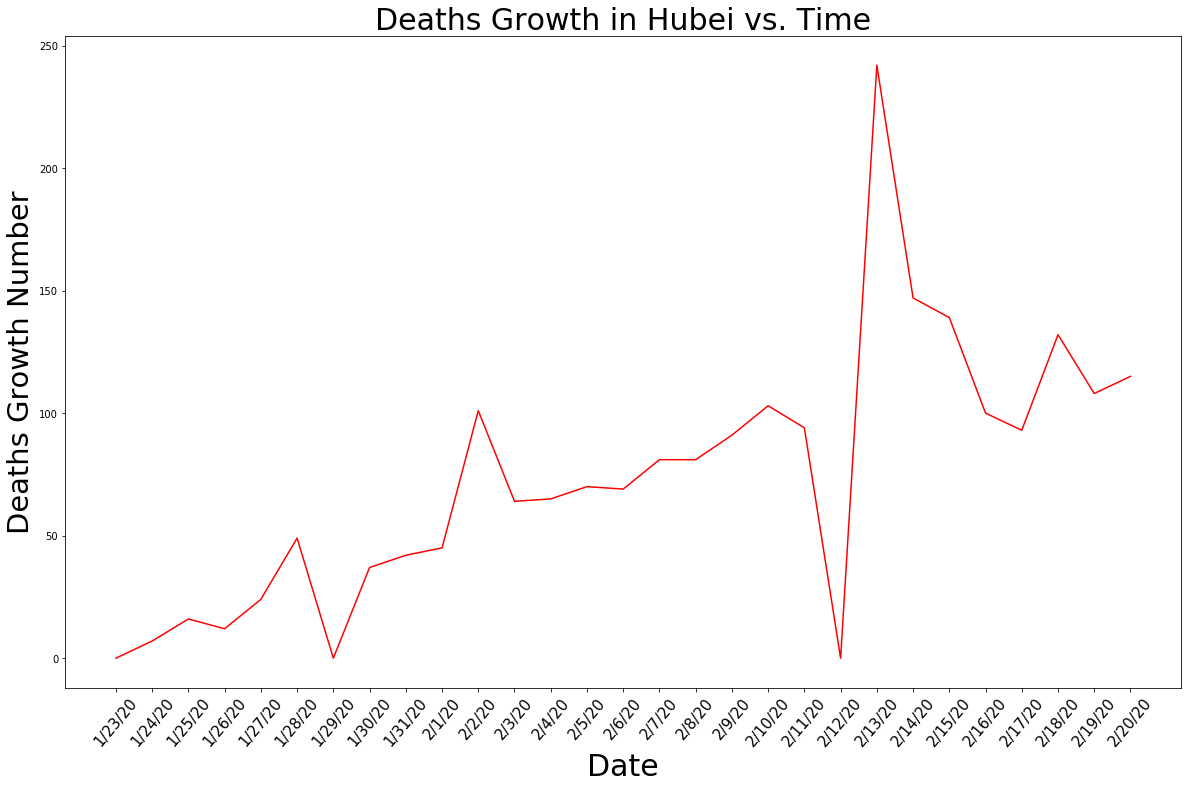

In [19]:
plt.figure(figsize=(20, 12))
plt.plot(dates, dNum, color='red')
plt.title('Deaths Growth in Hubei vs. Time', size=30)
plt.xlabel('Date', size=30)
plt.ylabel('Deaths Growth Number', size=29)
plt.xticks(rotation=50, size=15)
plt.show()

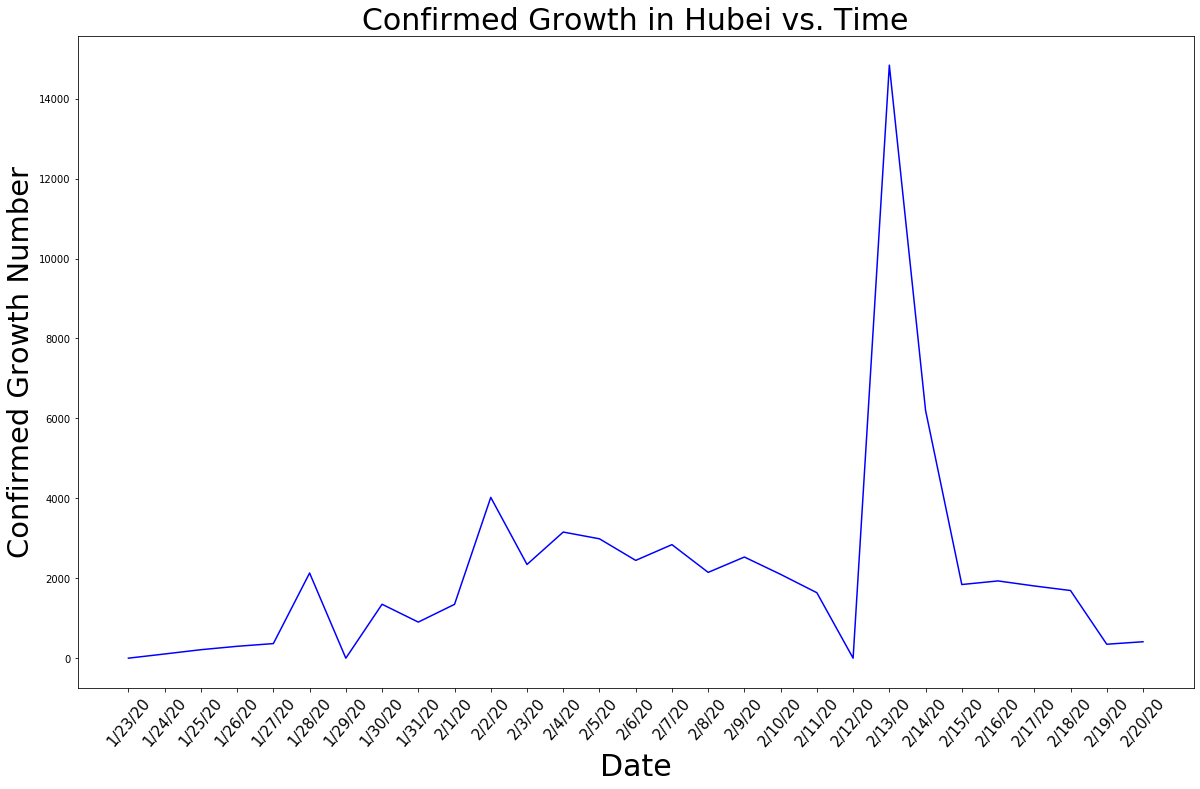

In [20]:
plt.figure(figsize=(20, 12))
plt.plot(dates, cNum, color='blue')
plt.title('Confirmed Growth in Hubei vs. Time', size=30)
plt.xlabel('Date', size=30)
plt.ylabel('Confirmed Growth Number', size=29)
plt.xticks(rotation=50, size=15)
plt.show()

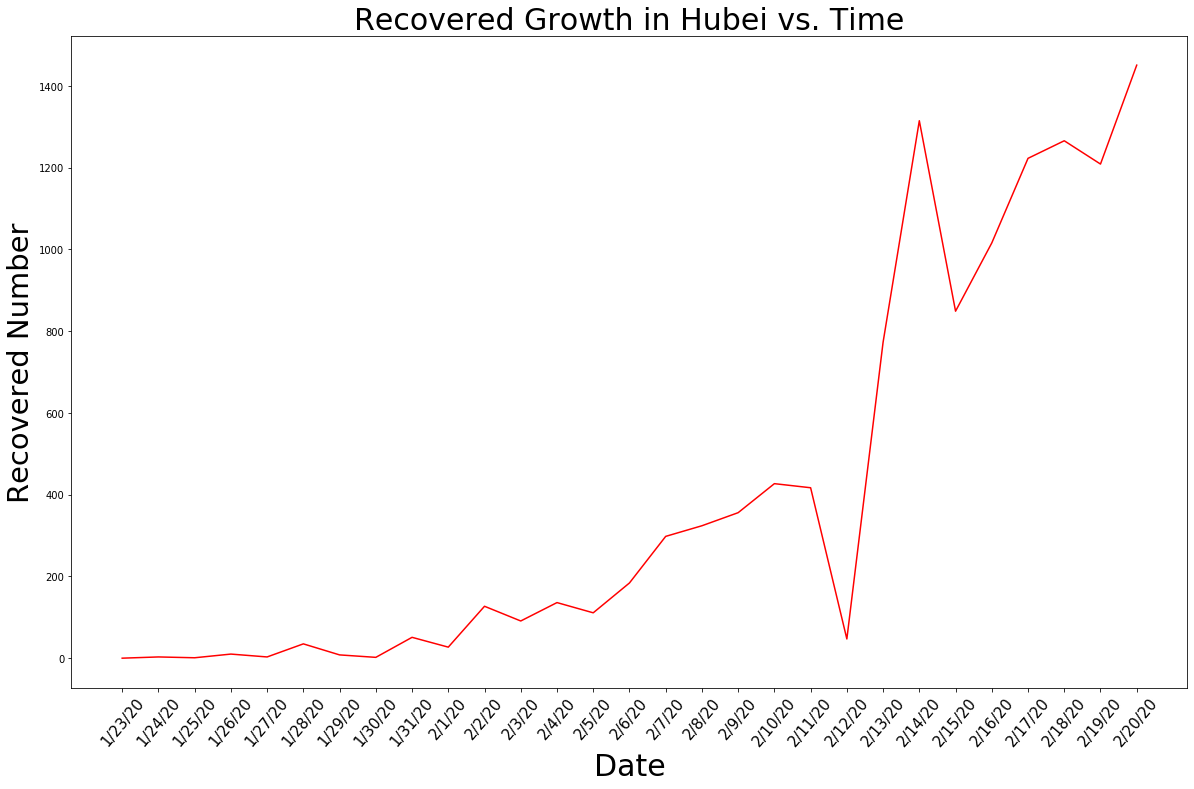

In [23]:
plt.figure(figsize=(20, 12))
plt.plot(dates, rNum, color='red')
plt.title('Recovered Growth in Hubei vs. Time', size=30)
plt.xlabel('Date', size=30)
plt.ylabel('Recovered Number', size=29)
plt.xticks(rotation=50, size=15)
plt.show()

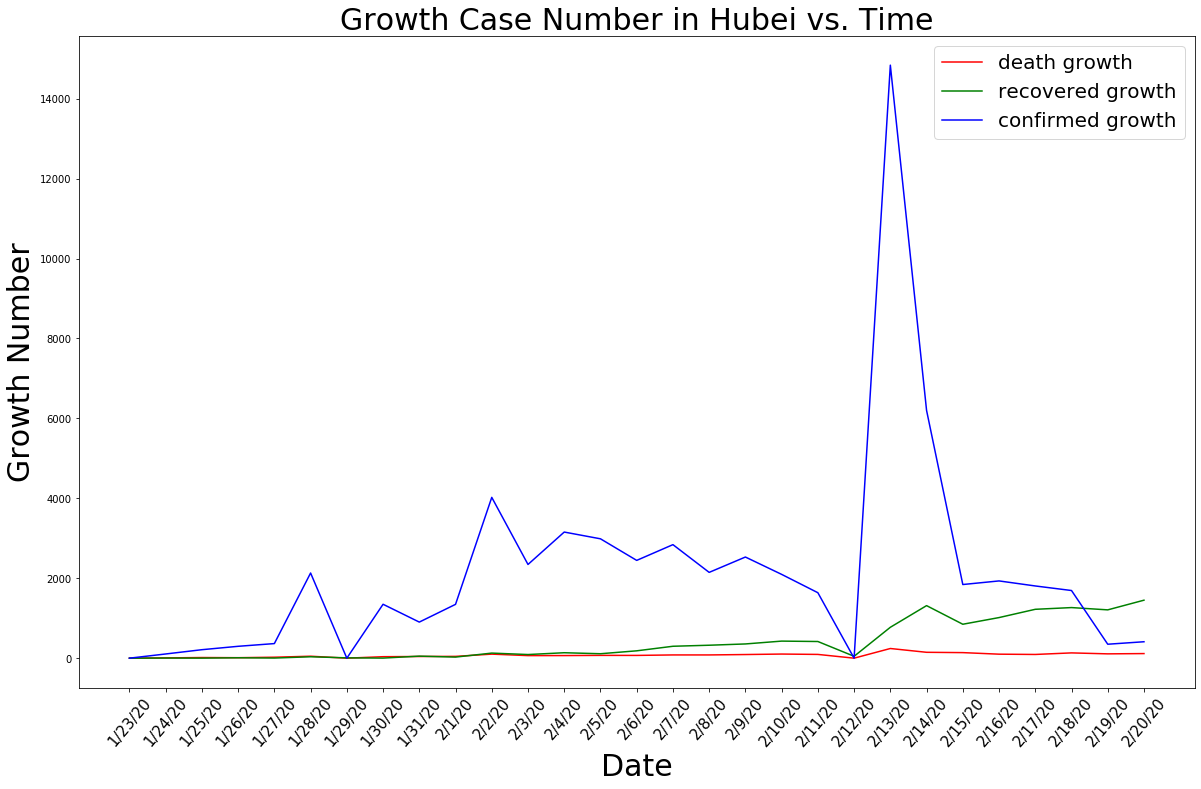

In [22]:
plt.figure(figsize=(20, 12))
plt.plot(dates, dNum, color='red')
plt.plot(dates, rNum, color='green')
plt.plot(dates, cNum, color='blue')
plt.legend(['death growth', 'recovered growth','confirmed growth'], loc='best', fontsize=20) 
plt.title('Growth Case Number in Hubei vs. Time', size=30)
plt.xlabel('Date', size=30) 
plt.ylabel('Growth Number', size=30) 
plt.xticks(rotation=50, size=15) 
plt.show()